# Secretary Problem

After reading about the [SecretraryProblem](https://en.wikipedia.org/wiki/Secretary_problem) I was curious about the shape of the distribution of the % optimal candidates accross stopping points.

In [3]:
from typing import List
from itertools import permutations, islice
from numpy.random import permutation
import numpy as np
import matplotlib.pyplot as plt

# Runs the strategy of stoping at the given value using the given secretary permutation
def run_stopping(sec_permutation: List[int], stopping_val: int):
    best_so_far = len(sec_permutation) + 1
    for ind, secretary in enumerate(sec_permutation):
        if ind + 1 < stopping_val:
            if secretary < best_so_far:
                best_so_far = secretary
        else:
            if secretary < best_so_far:
                return secretary
    # If we got to the end we have to take the last option
    return sec_permutation[-1]

# Generates m pemutations of the numbers 1-n
def generate_perms(n: int, m: int):
    return [permutation(n) + 1 for _ in range(m)]

# Runs run_stopping at each possible point on num_sim
def run_sim(num_sec: int, num_perm: int):
    perms = generate_perms(num_sec, num_perm)
    return np.array([[run_stopping(perm, stop) for stop in range(1, num_sec + 1)] for perm in perms])

In [4]:
# Run the simulation
num_perm = 10000
res = run_sim(100, num_perm)
# Calculate the rate that each stopping point was optimal
percentages = (res == 1).sum(axis=0) / num_perm

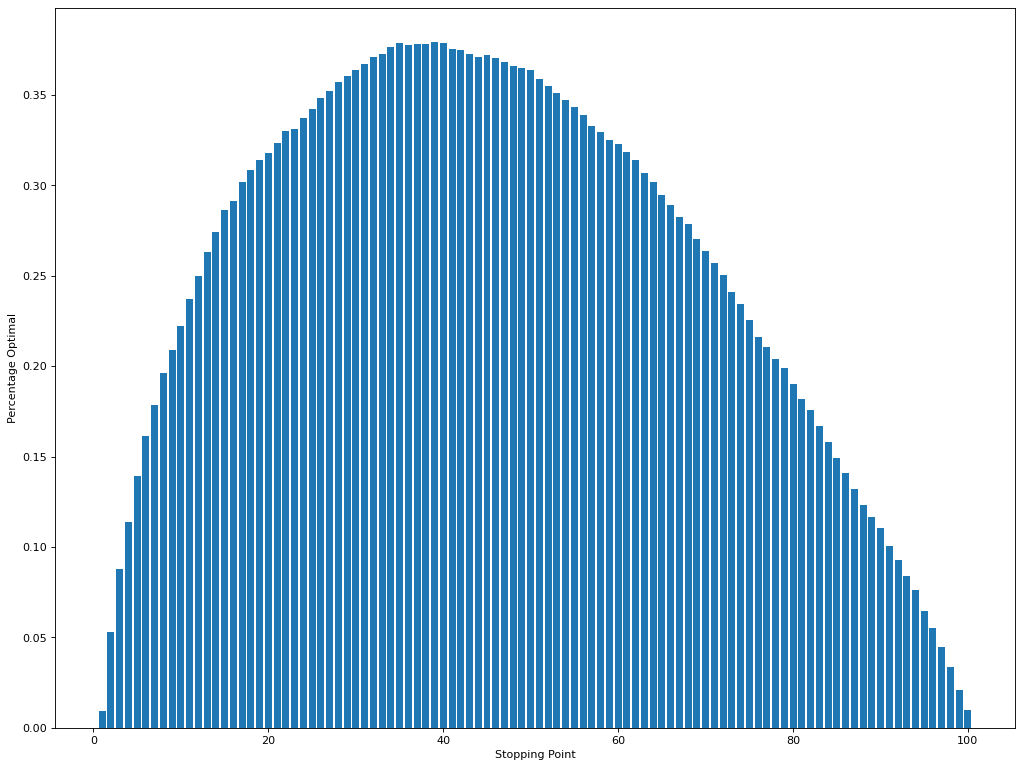

In [5]:
fig = plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
ax.bar(range(1,101), percentages)
ax.set_xlabel("Stopping Point")
ax.set_ylabel("Percentage Optimal")
plt.show()